In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Display all columns
pd.set_option('display.max_columns', None)




In [26]:
df = pd.read_csv(r'/Users/jakubptak/Desktop/iris.csv')

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Assuming the last column is the target (species)
X = df.iloc[:, :-1]  # All columns except the last one (features)
Y = df.iloc[:, -1]   # Only the last column (species)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First Five Rows of the Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Summary Statistics:
       sepal_length  sepal_width  petal_length  

<Figure size 1200x800 with 0 Axes>

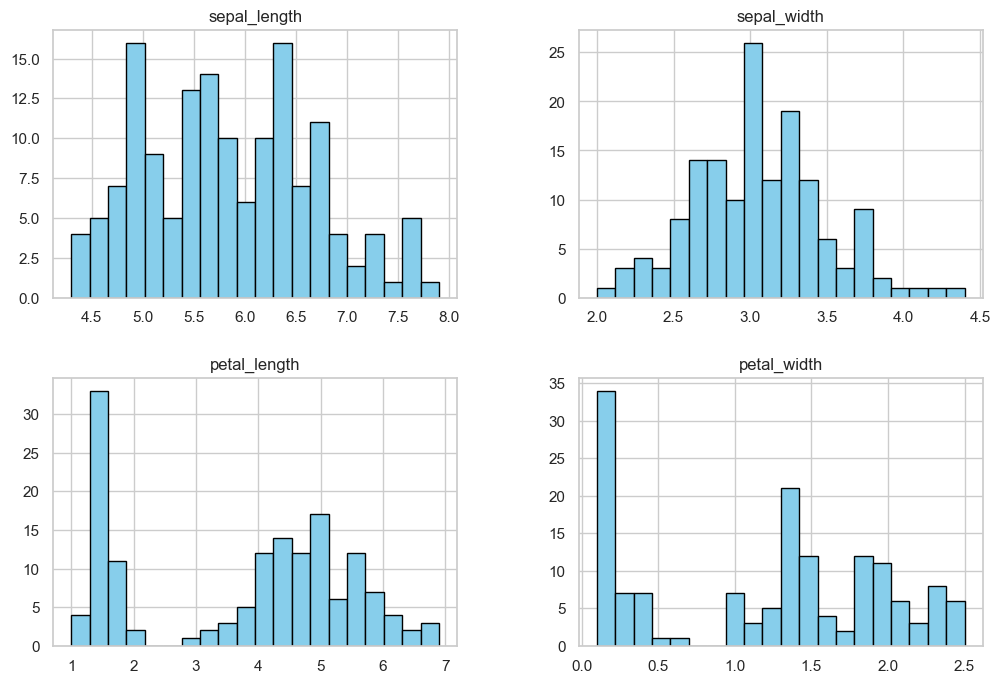

In [32]:
# Display dataset information
print("\nDataset Information:")
print(df.info())

# Display first few rows
print("\nFirst Five Rows of the Dataset:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Species distribution
print("\nSpecies Count:")
print(df.iloc[:, -1].value_counts())

# Set style for seaborn plots
sns.set(style="whitegrid")

# Plot histograms for all numerical features
plt.figure(figsize=(12, 8))
df.iloc[:, :-1].hist(bins=20, figsize=(12, 8), layout=(2, 2), color='skyblue', edgecolor='black')

# Show all plots in one window
plt.show()


In [34]:
# Convert to DataFrame for easier handling
iris_df = pd.DataFrame(X, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

# Calculate the summary statistics
summary_stats = iris_df.describe().T

# Prepare the final table with the required statistics
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Print the result
print(summary_stats)


# Calculate the summary statistics
summary_stats = iris_df.describe().T

# Prepare the final table with the required statistics
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Print the result
print(summary_stats)



              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


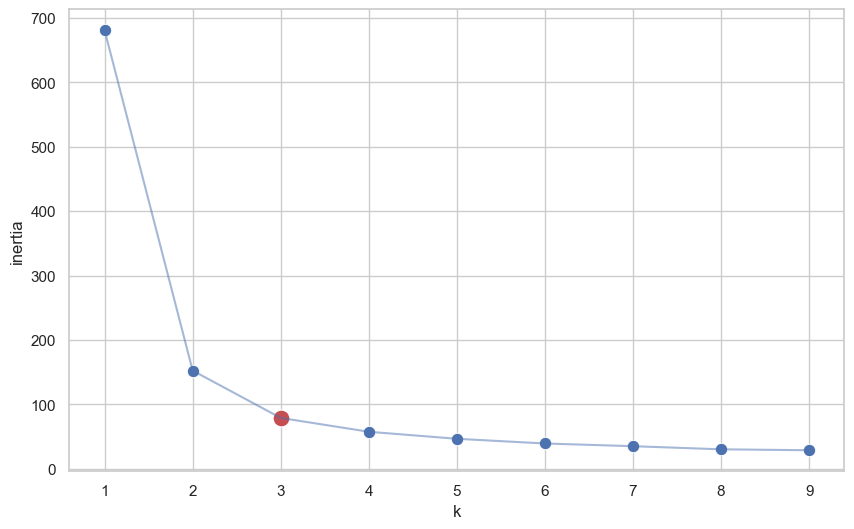

In [35]:
from sklearn.cluster import KMeans

inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(X)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(ylabel='inertia', xlabel='k');

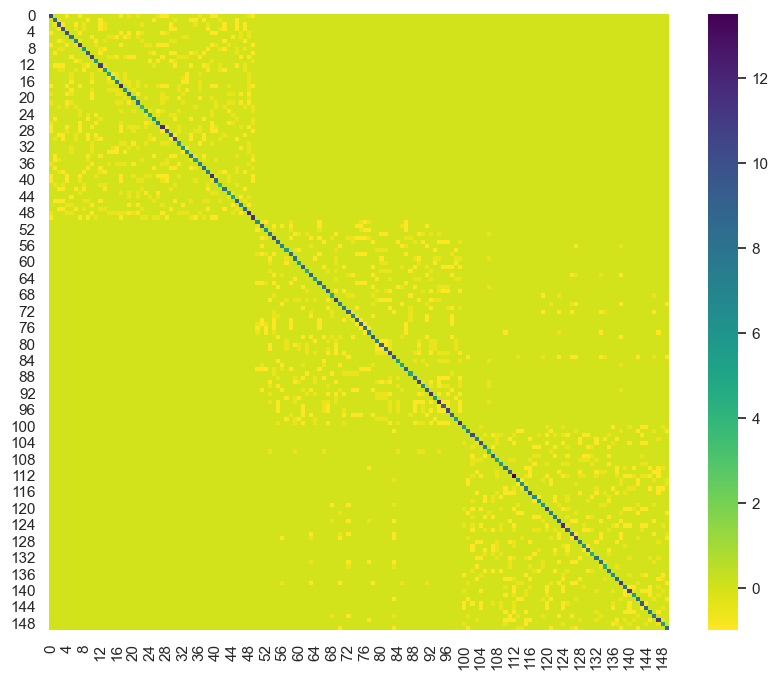

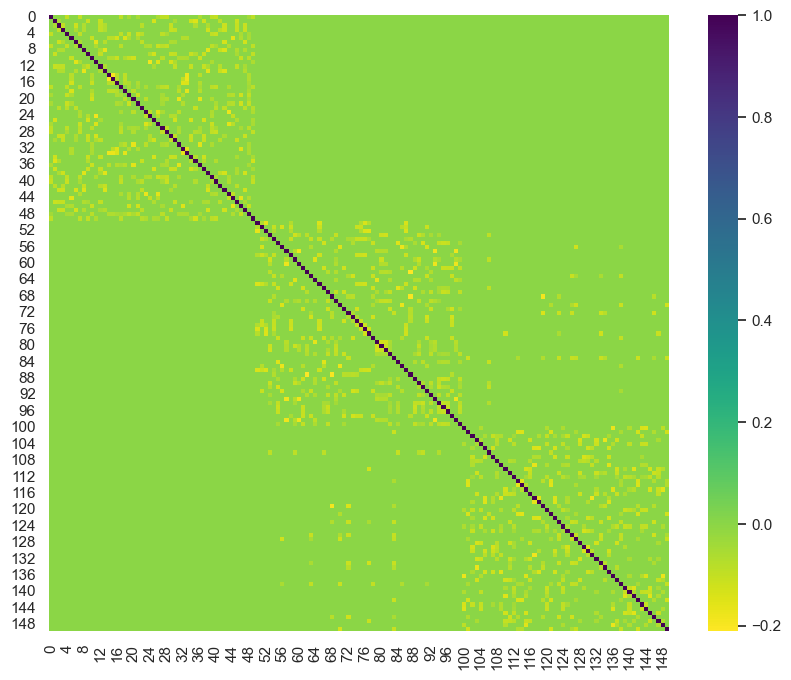

In [38]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacians(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()

    graph_laplacian_norm_s = sparse.csgraph.laplacian(adjacency_matrix_s, normed=True)
    graph_laplacian_norm = graph_laplacian_norm_s.toarray()
    
    return graph_laplacian, graph_laplacian_norm

    
graph_laplacian, graph_laplacian_norm = generate_graph_laplacians(df=X, nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='');
# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian_norm, ax=ax, cmap='viridis_r')
ax.set(title='');

In [40]:
from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)
eigenvals_norm, eigenvcts_norm = linalg.eig(graph_laplacian_norm)
np.unique(np.imag(eigenvals))

array([0.])

In [41]:
np.unique(np.imag(eigenvals_norm))

array([0.])

In [42]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

eigenvals_norm, eigenvcts_norm = compute_spectrum_graph_laplacian(graph_laplacian_norm)

In [43]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.9999999999999998
Max Norm: 1.0000000000000002


In [44]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2), 
  axis=0, 
  arr=eigenvcts_norm
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.9999999999999998
Max Norm: 1.0


In [45]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]


eigenvals_sorted_indices_norm = np.argsort(eigenvals_norm)
eigenvals_sorted_norm = eigenvals_norm[eigenvals_sorted_indices_norm]


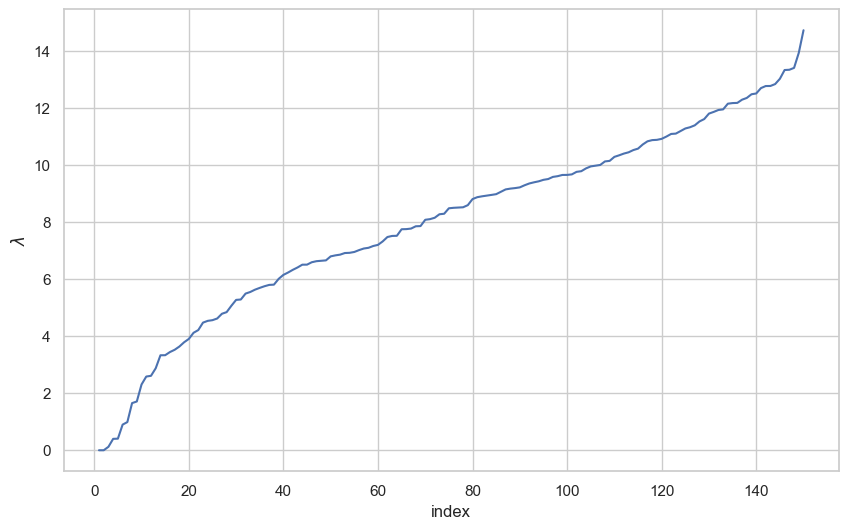

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='', xlabel='index', ylabel=r'$\lambda$');

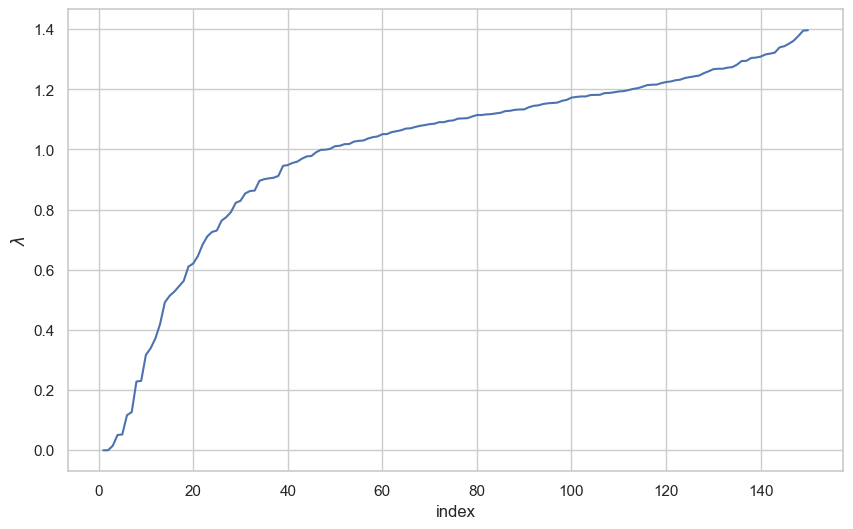

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices_norm.size + 1), y=eigenvals_sorted_norm, ax=ax)
ax.set(title='', xlabel='index', ylabel=r'$\lambda$');

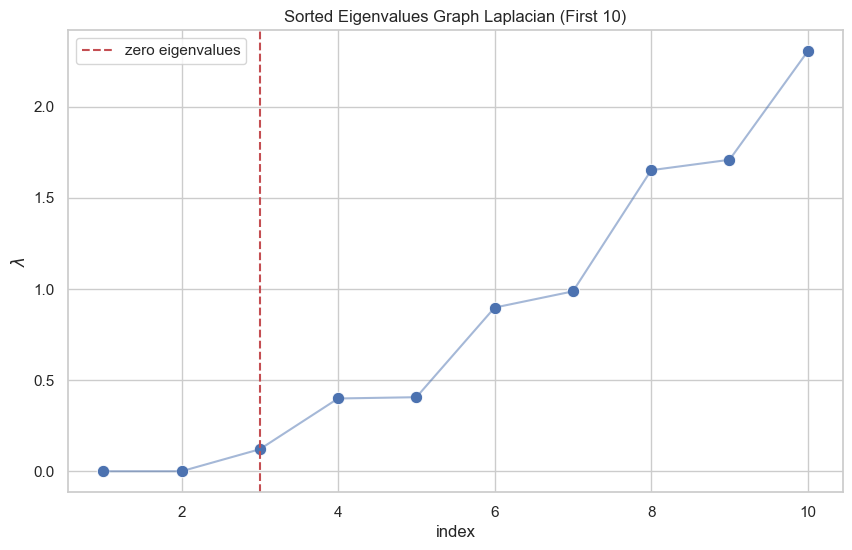

In [48]:
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');


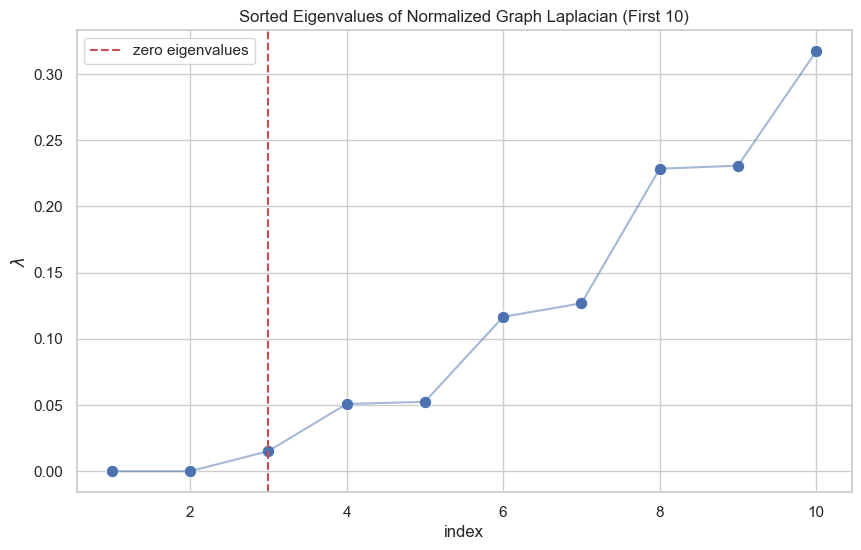

In [49]:
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices_norm[: index_lim].size + 1), y=eigenvals_sorted_norm[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices_norm[: index_lim].size + 1), y=eigenvals_sorted_norm[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues of Normalized Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');


In [50]:
zero_eigenvals_index = np.argwhere(abs(eigenvals) < 2e-1)
eigenvals[zero_eigenvals_index]

array([[-6.66133815e-16],
       [ 1.47629805e-15],
       [ 1.20652016e-01]])

In [51]:
zero_eigenvals_index_norm = np.argwhere(abs(eigenvals_norm) < 2e-2)
eigenvals[zero_eigenvals_index_norm]

array([[-6.66133815e-16],
       [ 1.47117847e+01],
       [ 1.47629805e-15]])

In [52]:
proj_df = pd.DataFrame(eigenvcts[:, zero_eigenvals_index.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
proj_df.head()

,v_0,v_1,v_2
0,-0.141421,0.0,0.0
1,-0.141421,0.0,0.0
2,-0.141421,0.0,0.0
3,-0.141421,0.0,0.0
4,-0.141421,0.0,0.0


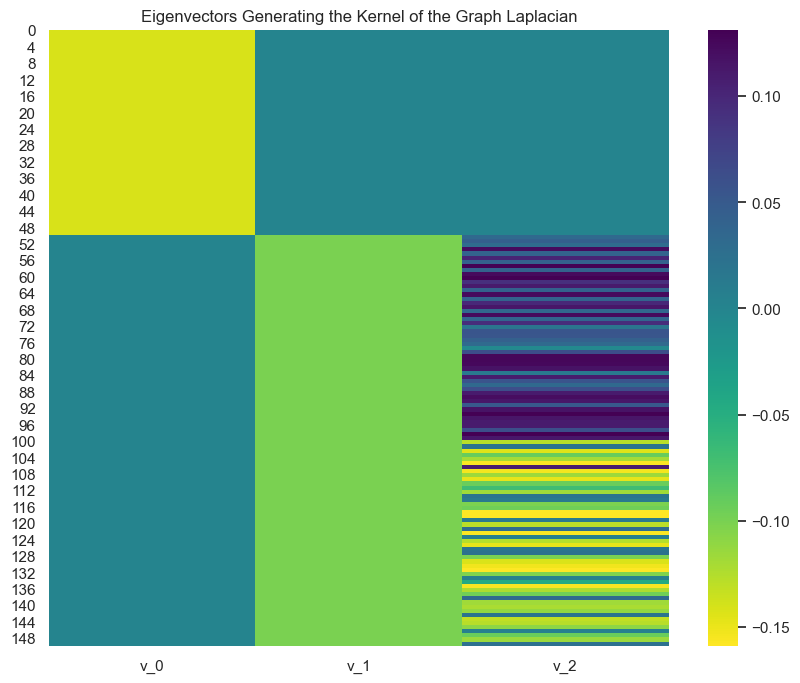

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(proj_df, ax=ax, cmap='viridis_r')
ax.set(title='Eigenvectors Generating the Kernel of the Graph Laplacian');

In [54]:
proj_df = pd.DataFrame(eigenvcts_norm[:, zero_eigenvals_index_norm.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
proj_df.head()

,v_0,v_1,v_2
0,-0.162019,0.0,0.0
1,-0.145774,0.0,0.0
2,-0.158114,0.0,0.0
3,-0.158114,0.0,0.0
4,-0.158114,0.0,0.0


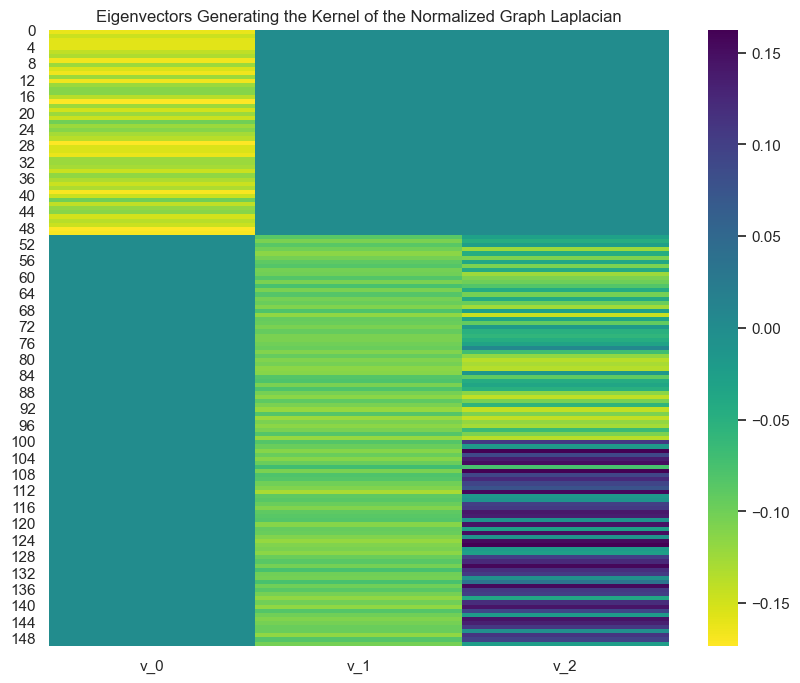

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(proj_df, ax=ax, cmap='viridis_r')
ax.set(title='Eigenvectors Generating the Kernel of the Normalized Graph Laplacian');

In [56]:
def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[: num_ev]

    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    return proj_df

In [57]:
inertias = []

k_candidates = range(1, 6)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(proj_df)
    inertias.append(k_means.inertia_)

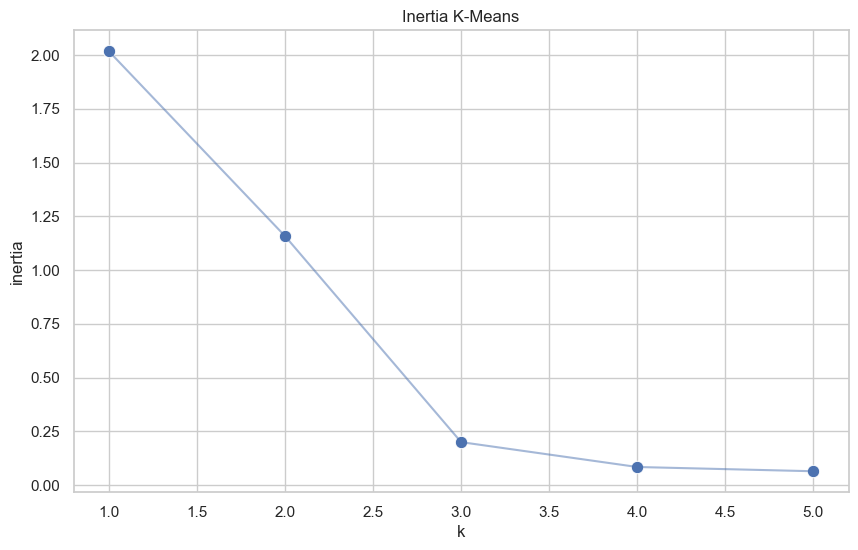

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

In [59]:
def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[: num_ev]

    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    return proj_df

project_and_transpose(eigenvals=eigenvals, eigenvcts=eigenvcts, num_ev=3)

,v_0,v_1,v_2
0,-0.141421,0.0,0.000000
1,-0.141421,0.0,0.000000
2,-0.141421,0.0,0.000000
3,-0.141421,0.0,0.000000
4,-0.141421,0.0,0.000000
...,...,...,...
145,0.000000,-0.1,-0.109345
146,0.000000,-0.1,0.005521
147,0.000000,-0.1,-0.092532
148,0.000000,-0.1,-0.114791
